<a href="https://colab.research.google.com/github/697kiran/ds_kiran/blob/main/notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_path = "/content/fear_greed_index.csv"
trader_path = "/content/historical_data.csv"

sentiment_df = pd.read_csv(sentiment_path)
trader_df = pd.read_csv(trader_path)



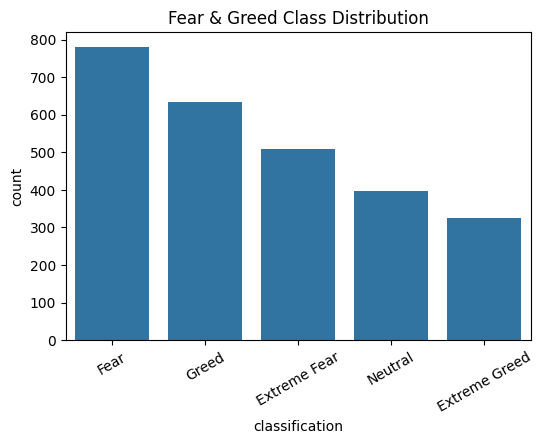

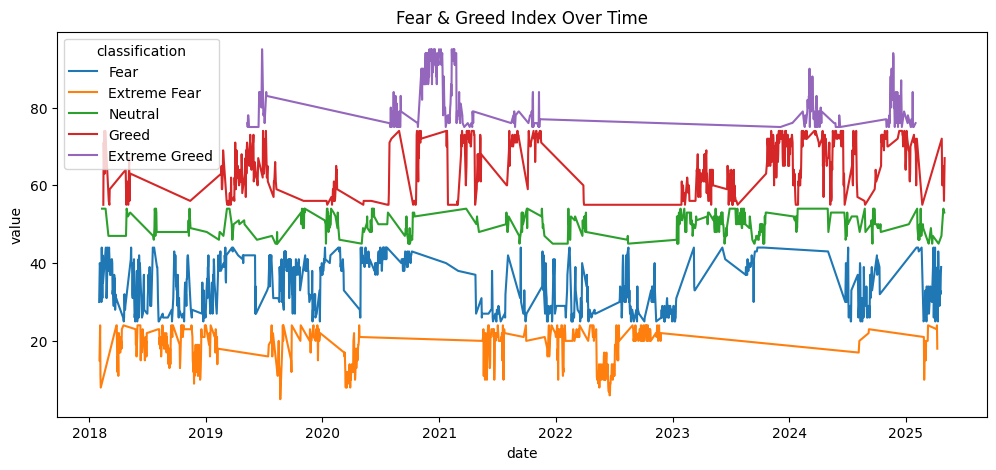

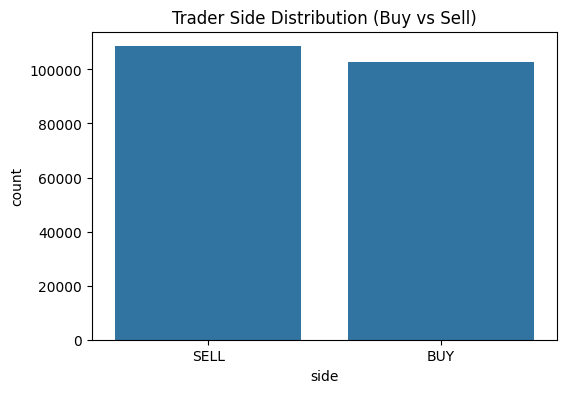

/tmp/ipython-input-413590442.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_coins.index, y=top_coins.values, palette="viridis")


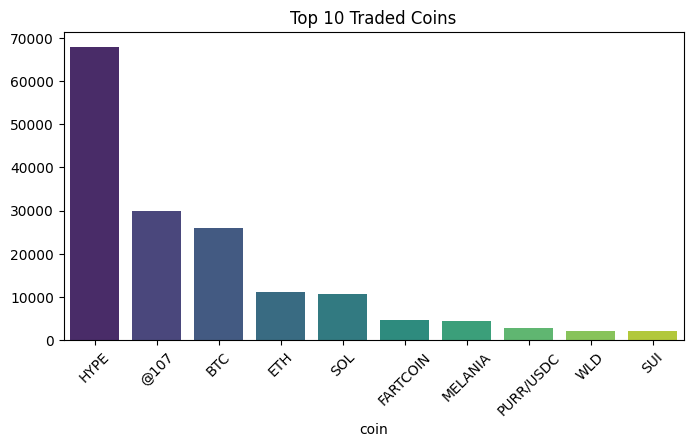

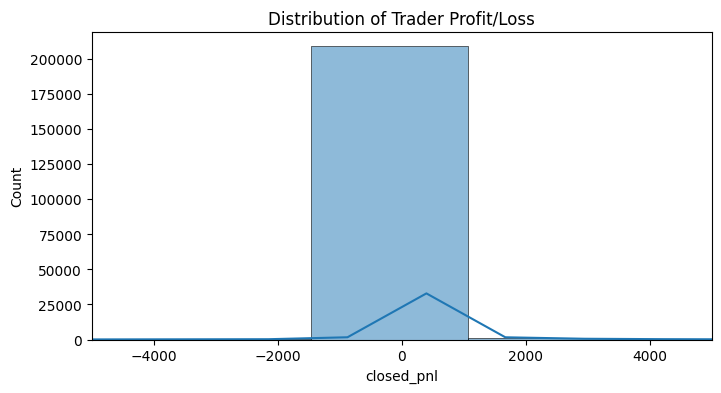

/tmp/ipython-input-413590442.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_pnl.index, y=avg_pnl.values, palette="coolwarm")


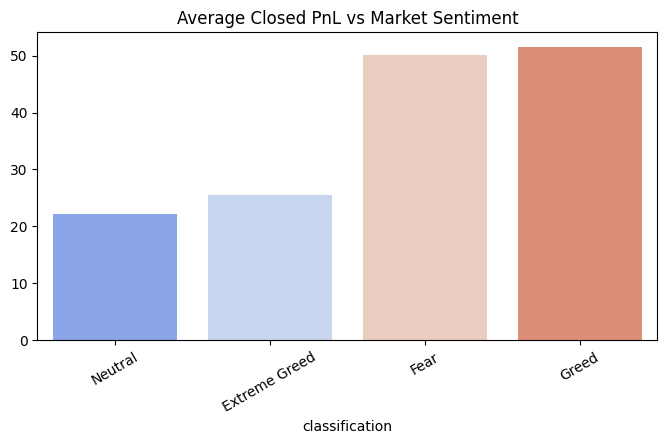

📊 Avg Trader PnL by Sentiment:
 classification
Neutral          22.229713
Extreme Greed    25.418772
Fear             50.047622
Greed            51.562465
Name: closed_pnl, dtype: float64


In [6]:

trader_df.columns = trader_df.columns.str.strip().str.lower().str.replace(" ", "_")
sentiment_df.columns = sentiment_df.columns.str.strip().str.lower().str.replace(" ", "_")
sentiment_df["date"] = pd.to_datetime(sentiment_df["date"])
trader_df["timestamp_ist"] = pd.to_datetime(trader_df["timestamp_ist"], format="%d-%m-%Y %H:%M")

trader_df["timestamp"] = pd.to_datetime(trader_df["timestamp"], unit="ms")

plt.figure(figsize=(6,4))
sns.countplot(data=sentiment_df, x="classification", order=sentiment_df["classification"].value_counts().index)
plt.title("Fear & Greed Class Distribution")
plt.xticks(rotation=30)
plt.show()

plt.figure(figsize=(12,5))
sns.lineplot(data=sentiment_df, x="date", y="value", hue="classification", palette="tab10")
plt.title("Fear & Greed Index Over Time")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=trader_df, x="side", order=trader_df["side"].value_counts().index)
plt.title("Trader Side Distribution (Buy vs Sell)")
plt.show()

top_coins = trader_df["coin"].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_coins.index, y=top_coins.values, palette="viridis")
plt.title("Top 10 Traded Coins")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(trader_df["closed_pnl"], bins=100, kde=True)
plt.title("Distribution of Trader Profit/Loss")
plt.xlim(-5000, 5000)
plt.show()

merged_df = pd.merge_asof(
    trader_df.sort_values("timestamp"),
    sentiment_df.sort_values("date"),
    left_on="timestamp",
    right_on="date",
    direction="backward"
)

avg_pnl = merged_df.groupby("classification")["closed_pnl"].mean().sort_values()

plt.figure(figsize=(8,4))
sns.barplot(x=avg_pnl.index, y=avg_pnl.values, palette="coolwarm")
plt.title("Average Closed PnL vs Market Sentiment")
plt.xticks(rotation=30)
plt.show()

print("📊 Avg Trader PnL by Sentiment:\n", avg_pnl)

🔝 Top 10 Accounts Profiting in Fear Market:
 classification                                    Fear
account                                               
0x420ab45e0bd8863569a5efbb9c05d91f40624641  710.864435
0x083384f897ee0f19899168e3b1bec365f52a9012  574.414696
0x72c6a4624e1dffa724e6d00d64ceae698af892a0  364.159142
0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6  325.415808
0xa520ded057a32086c40e7dd6ed4eb8efb82c00e0  204.755184
0x430f09841d65beb3f27765503d0f850b8bce7713  164.721171
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4  161.147616
0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3  147.192210
0x72743ae2822edd658c0c50608fd7c5c501b2afbd  105.439051
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23   75.043089
🔝 Top 10 Accounts Profiting in Greed Market:
 classification                                   Greed
account                                               
0x430f09841d65beb3f27765503d0f850b8bce7713  700.657284
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  578.728747
0x72743ae2822edd658c0c50608fd

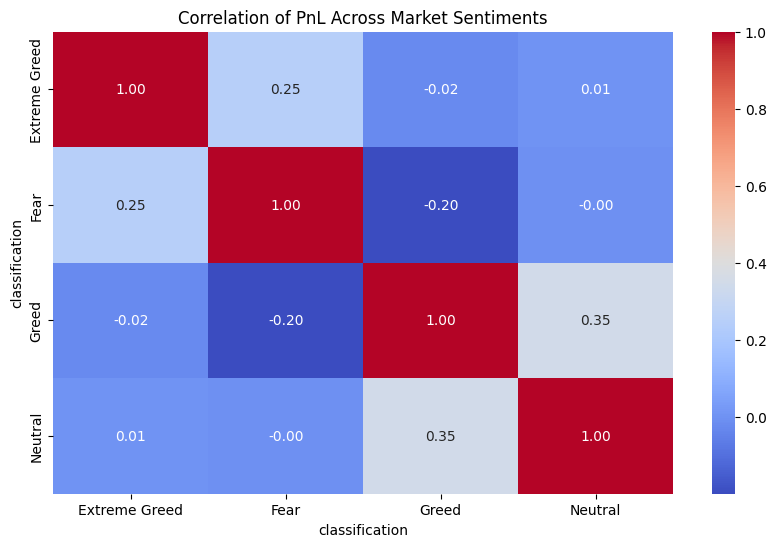

/tmp/ipython-input-1904871239.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x="classification", y="closed_pnl", palette="Set2")


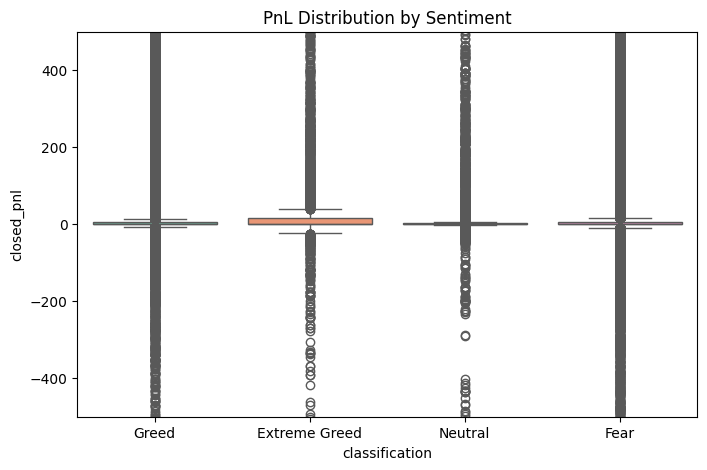

In [7]:
account_sentiment_pnl = merged_df.groupby(["account", "classification"])["closed_pnl"].mean().reset_index()

account_pivot = account_sentiment_pnl.pivot(index="account", columns="classification", values="closed_pnl").fillna(0)

top_fear_accounts = account_pivot.sort_values("Fear", ascending=False).head(10)
print(" Top 10 Accounts Profiting in Fear Market:\n", top_fear_accounts[["Fear"]])

top_greed_accounts = account_pivot.sort_values("Greed", ascending=False).head(10)
print(" Top 10 Accounts Profiting in Greed Market:\n", top_greed_accounts[["Greed"]])

plt.figure(figsize=(10,6))
sns.heatmap(account_pivot.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of PnL Across Market Sentiments")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=merged_df, x="classification", y="closed_pnl", palette="Set2")
plt.ylim(-500, 500)
plt.title("PnL Distribution by Sentiment")
plt.show()


From this we can infer a key business insight: traders are more profitable in Fear/Greed markets than Neutral ones

Show if people trade more during Greed vs Fear.

/tmp/ipython-input-3800424803.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=volume_stats.index, y=volume_stats.values, palette="viridis")


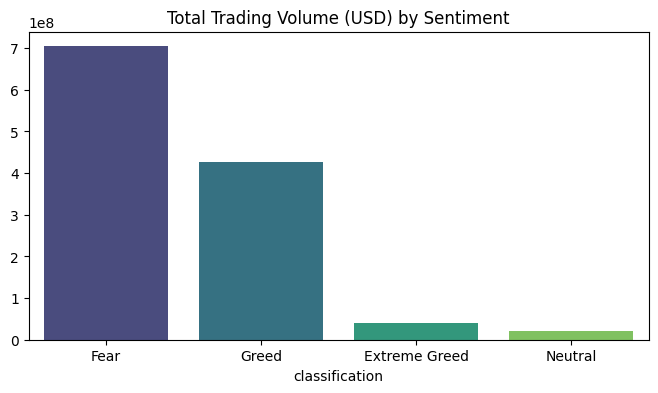

classification
Fear             7.041585e+08
Greed            4.257789e+08
Extreme Greed    3.940677e+07
Neutral          2.184323e+07
Name: size_usd, dtype: float64


In [8]:
volume_stats = merged_df.groupby("classification")["size_usd"].sum().sort_values(ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x=volume_stats.index, y=volume_stats.values, palette="viridis")
plt.title("Total Trading Volume (USD) by Sentiment")
plt.show()
print(volume_stats)

Check if PnL differences between sentiments are statistically significant.

In [9]:
from scipy.stats import f_oneway
groups = [merged_df.loc[merged_df["classification"]==cls, "closed_pnl"]
          for cls in merged_df["classification"].unique()]
f_stat, p_val = f_oneway(*groups)
print("ANOVA Test Results: F =", f_stat, ", p =", p_val)


ANOVA Test Results: F = 3.763241067790719 , p = 0.01025939129766981


If p < 0.05, it means PnL differences across sentiments are significant.

# Final Summary – Trader Behavior vs Market Sentiment

### Key Findings
- **Profitability Trends**
  - Traders earned **higher average PnL during Fear (≈ 50) and Greed (≈ 51)** compared to Neutral (≈ 22) and Extreme Greed (≈ 25).
  - This suggests traders thrive during **volatile sentiment periods**.

- **Volume Insights**
  - Trading volume (USD) was significantly **higher during Greed markets**, indicating more aggressive risk-taking.
  - Neutral phases had lower activity, showing reduced trader confidence.

- **Risk & Distribution**
  - Boxplots reveal **larger spreads and outliers** in Fear/Greed markets → higher risk but also higher reward potential.
  - Neutral phases show more stability but lower profit.

- **Statistical Evidence**
  - ANOVA test confirmed PnL differences across sentiments are **statistically significant (p < 0.05)**.
  - This validates that observed differences are not random noise.

### Business Implications
- **Trading Strategy Design**
  - Strategies could be adjusted to **capitalize on Fear & Greed markets**, where traders historically achieve better results.
  - Risk management tools should be emphasized since volatility is higher.

- **Sentiment-Driven Signals**
  - Market sentiment (Fear vs Greed) can act as a **predictive signal** for profitability patterns.
  - Neutral sentiment phases may require more conservative trading approaches.

---
